In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the EV census data from the provided CSV file
file_path = 'Electric_Vehicle_Population_Data.csv'
ev_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(ev_data.head())



   VIN (1-10)      County          City State  Postal Code  Model Year  \
0  3MW5P9J02M     Fairfax    Alexandria    VA      22308.0        2021   
1  2T3YL4DV4D   San Diego     San Diego    CA      92154.0        2013   
2  5YJSA1E24K      Yakima        Yakima    WA      98908.0        2019   
3  5YJ3E1EB9K      Skagit     Anacortes    WA      98221.0        2019   
4  5UXKT0C36H  Cumberland  Fayetteville    NC      28305.0        2017   

     Make    Model                   Electric Vehicle Type  \
0     BMW     330E  Plug-in Hybrid Electric Vehicle (PHEV)   
1  TOYOTA     RAV4          Battery Electric Vehicle (BEV)   
2   TESLA  MODEL S          Battery Electric Vehicle (BEV)   
3   TESLA  MODEL 3          Battery Electric Vehicle (BEV)   
4     BMW       X5  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0             Not eligible due to low battery range              20   
1           Clean Alternative Fuel Vehic

In [24]:
# Check for missing values
print("Missing values before cleaning:")
print(ev_data.isnull().sum())

Missing values before cleaning:
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [13]:
# Drop rows with missing values (if any)
ev_data = ev_data.dropna()

In [14]:
# Drop duplicate rows, if any
ev_data = ev_data.drop_duplicates()

In [25]:
# Display the first few rows after cleaning
print("First few rows after cleaning:")
print(ev_data.head())

First few rows after cleaning:
    VIN (1-10)     County               City State  Postal Code  Model Year  \
10  1N4AZ0CP6F  Snohomish           Lynnwood    WA      98036.0        2015   
11  1N4AZ0CP1F     Kitsap       Port Orchard    WA      98367.0        2015   
13  1N4AZ0CP4E  Snohomish  Mountlake Terrace    WA      98043.0        2014   
14  5YJ3E1EA1J     Island         Coupeville    WA      98239.0        2018   
15  WP1AE2AY4K     Kitsap  Bainbridge Island    WA      98110.0        2019   

       Make    Model                   Electric Vehicle Type  \
10   NISSAN     LEAF          Battery Electric Vehicle (BEV)   
11   NISSAN     LEAF          Battery Electric Vehicle (BEV)   
13   NISSAN     LEAF          Battery Electric Vehicle (BEV)   
14    TESLA  MODEL 3          Battery Electric Vehicle (BEV)   
15  PORSCHE  CAYENNE  Plug-in Hybrid Electric Vehicle (PHEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
10           Clean Alternative Fuel V

In [26]:
# Check for missing values after cleaning
print("Missing values after cleaning:")
print(ev_data.isnull().sum())

Missing values after cleaning:
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [27]:
# Save the cleaned data to a new CSV file
cleaned_file_path = 'Cleaned_Electric_Vehicle_Data.csv'
ev_data.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")


Cleaned data saved to Cleaned_Electric_Vehicle_Data.csv


In [15]:
# Load the cleaned EV census data
cleaned_file_path = 'Cleaned_Electric_Vehicle_Data.csv'
ev_data_cleaned = pd.read_csv(cleaned_file_path)

In [28]:
ev_data_cleaned['Model Year'] = pd.to_datetime(ev_data_cleaned['Model Year'], format='%Y')

In [29]:
# Group data by year and calculate the total number of EVs each year
yearly_ev_counts = ev_data_cleaned.groupby(ev_data_cleaned['Model Year'].dt.year)['VIN (1-10)'].count().reset_index()
yearly_ev_counts = yearly_ev_counts.rename(columns={'VIN (1-10)': 'Total EVs'})

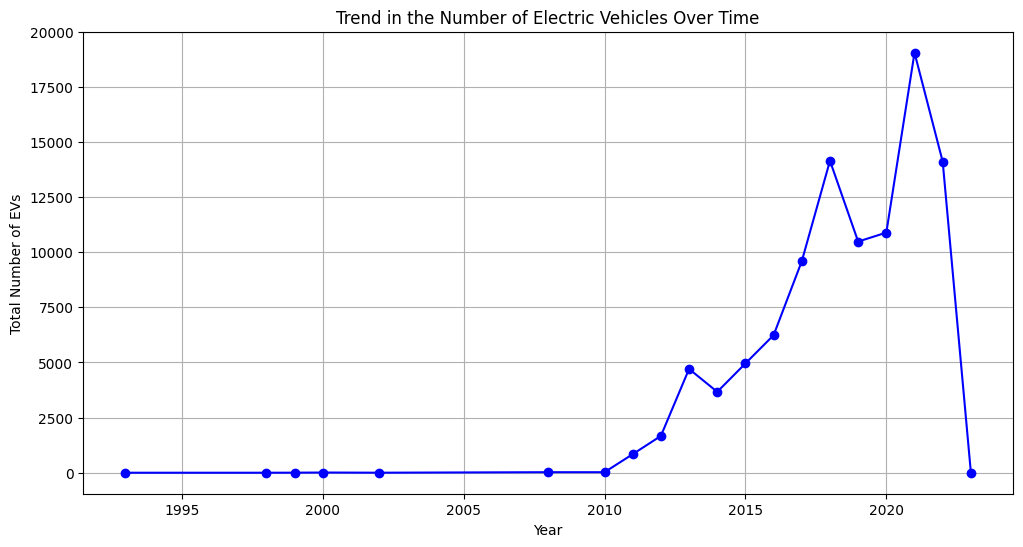

In [67]:
# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(yearly_ev_counts['Model Year'], yearly_ev_counts['Total EVs'], marker='o', linestyle='-', color='b')
plt.title('Trend in the Number of Electric Vehicles Over Time')
plt.xlabel('Year')
plt.ylabel('Total Number of EVs')
plt.grid(True)
plt.show()

In [51]:
# Group data by county and calculate the total number of EVs
county_ev_counts = ev_data_cleaned.groupby('County')['VIN (1-10)'].count().reset_index()
county_ev_counts = county_ev_counts.rename(columns={'VIN (1-10)': 'Total EVs'})

In [53]:
# Sort counties by the total number of EVs
county_ev_counts = county_ev_counts.sort_values(by='Total EVs', ascending=False)

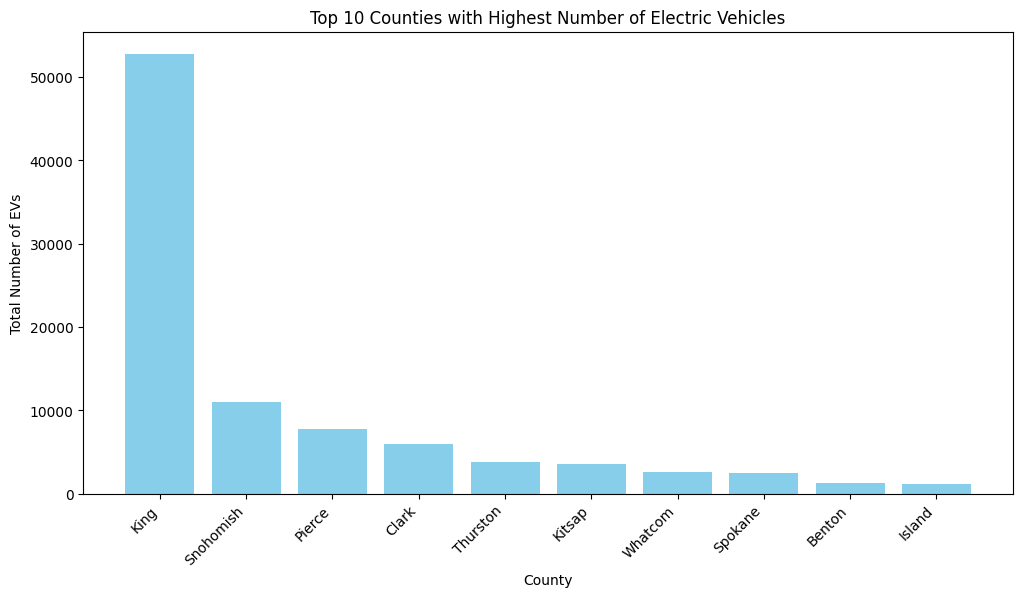

In [54]:
# Plot the top 10 counties with the highest number of EVs
top_counties = county_ev_counts.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_counties['County'], top_counties['Total EVs'], color='skyblue')
plt.title('Top 10 Counties with Highest Number of Electric Vehicles')
plt.xlabel('County')
plt.ylabel('Total Number of EVs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [55]:
# Display the top states and their counts
print(top_counties)

       County  Total EVs
15       King      52809
29  Snohomish      11031
25     Pierce       7722
5       Clark       6016
32   Thurston       3766
16     Kitsap       3569
35    Whatcom       2635
30    Spokane       2547
2      Benton       1249
13     Island       1226


In [ ]:
from textblob import TextBlob
import matplotlib.pyplot as plt
# Read comments from ProCon.txt
with open('ProCon.txt', 'r', encoding='utf-8') as file:
    comments = file.readlines()

In [40]:
# Perform sentiment analysis on the comments
sentiments = [TextBlob(comment).sentiment.polarity for comment in comments]

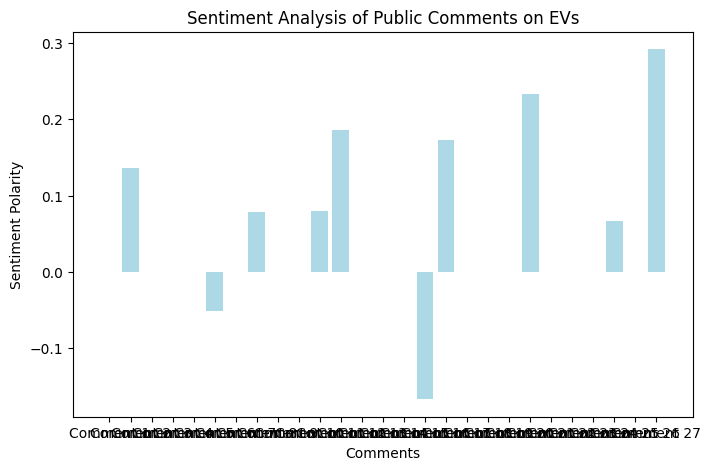

In [8]:
# Plot the sentiment distribution
plt.figure(figsize=(8, 5))
plt.bar(range(len(comments)), sentiments, color='lightblue')
plt.title('Sentiment Analysis of Public Comments on EVs')
plt.xlabel('Comments')
plt.ylabel('Sentiment Polarity')
plt.xticks(range(len(comments)), [f'Comment {i+1}' for i in range(len(comments))])
plt.show()

In [41]:
# Interpret sentiment results
average_sentiment = sum(sentiments) / len(sentiments)
print(f"Average Sentiment: {average_sentiment}")


Average Sentiment: 0.03807975350634081


In [42]:
# Display overall sentiment interpretation
if average_sentiment > 0:
    print("Overall positive sentiment.")
elif average_sentiment < 0:
    print("Overall negative sentiment.")
else:
    print("Mixed sentiment.")

Overall positive sentiment.


In [43]:
# Count the Number of Vehicles in Each Eligibility Category
eligibility_counts = ev_data_cleaned['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
print(eligibility_counts)

Clean Alternative Fuel Vehicle Eligible                         57629
Eligibility unknown as battery range has not been researched    27968
Not eligible due to low battery range                           14830
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64


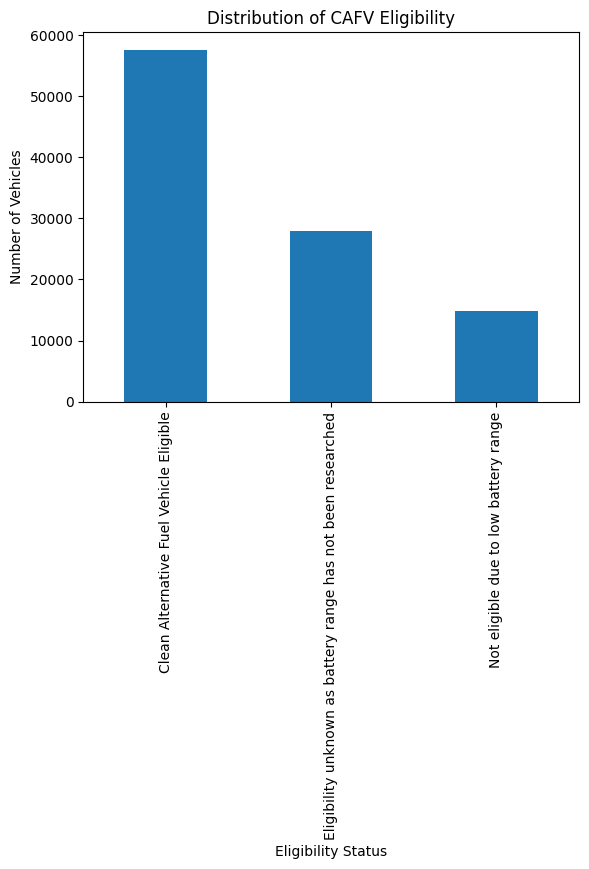

In [44]:
eligibility_counts.plot(kind='bar')
plt.title('Distribution of CAFV Eligibility')
plt.xlabel('Eligibility Status')
plt.ylabel('Number of Vehicles')
plt.show()

In [13]:
import pandas as pd
# Read comments from ProCon.txt
with open('ProCon.txt', 'r', encoding='utf-8') as file:
    comments = file.readlines()

# Perform sentiment analysis on the comments
sentiments = [TextBlob(comment).sentiment.polarity for comment in comments]

# Create a DataFrame with comments and sentiments
df_sentiments = pd.DataFrame({'Comment': comments, 'Sentiment': sentiments})

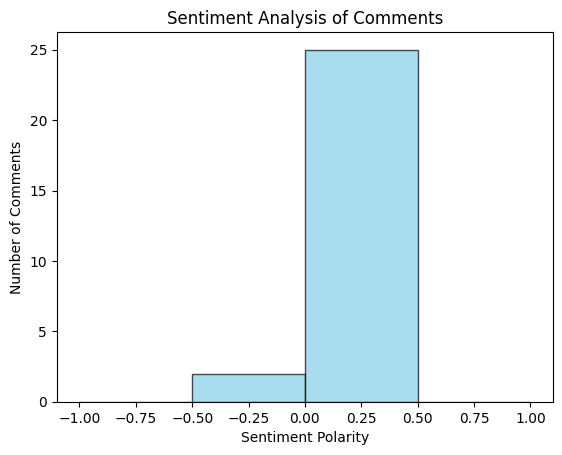

In [14]:
# Plot the distribution of sentiments
plt.hist(sentiments, bins=[-1, -0.5, 0, 0.5, 1], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Sentiment Analysis of Comments')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Comments')
plt.show()

In [15]:
# Explore reasons or themes in comments
positive_comments = df_sentiments[df_sentiments['Sentiment'] > 0]['Comment']
negative_comments = df_sentiments[df_sentiments['Sentiment'] < 0]['Comment']


In [16]:
# Display sample positive and negative comments
print("Sample Positive Comments:")
print(positive_comments.head(3).values)

print("\nSample Negative Comments:")
print(negative_comments.head(3).values)

Sample Positive Comments:
['Energy efficiency refers to the amount of energy from the fuel source that is converted into actual energy for powering the wheels of a vehicle. AEVs are far more efficient than conventional gas-powered vehicles: AEV batteries convert 59 to 62 percent of energy into vehicle movement while gas powered vehicles only convert between 17 and 21 percent. This means that charging an AEV’s battery puts more towards actually powering the vehicle than filling up at a gas pump.\n'
 "Improving battery technology in today's light-duty AEVs means they can drive 100 miles while consuming only 25 to 40 kilowatt-hours (kWh)  of electricity. Assuming that your electric car can travel three miles per kWh, the electric vehicle can travel about 43 miles for $1.00. By comparison, if we assume that gas costs $2.50 per gallon, an average gasoline vehicle with a fuel efficiency of 22 miles per gallon will only be able to travel 10 miles for the same price. The distance traveled for 

In [23]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Read text file into a DataFrame with specified encoding
with open("procon.txt", "r", encoding="utf-8") as file:
    comments = file.readlines()

# Create a DataFrame with the comments
ev_data = pd.DataFrame({'Comments': comments})

# Display the first few rows of the DataFrame
print("Sample Comments:")
print(ev_data.head())

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment polarity
def get_sentiment_polarity(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis to the "Comments" column
ev_data['Sentiment_Polarity'] = ev_data['Comments'].apply(get_sentiment_polarity)

# Print the sentiment analysis results
print("\nSentiment Analysis Results:")
print(ev_data[['Comments', 'Sentiment_Polarity']])


Sample Comments:
                                            Comments
0          Pro: Electric cars are energy efficient\n
1  Energy efficiency refers to the amount of ener...
2                                                 \n
3                                                 \n
4              Pro: Electric cars reduce emissions\n

Sentiment Analysis Results:
                                             Comments  Sentiment_Polarity
0           Pro: Electric cars are energy efficient\n              0.5994
1   Energy efficiency refers to the amount of ener...              0.8999
2                                                  \n              0.0000
3                                                  \n              0.0000
4               Pro: Electric cars reduce emissions\n              0.0000
5   Emission reduction, including reduced usage of...              0.4742
6                                                  \n              0.0000
7   Improving battery technology in today's 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [59]:
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming there is a column named "Clean Alternative Fuel Vehicle (CAFV) Eligibility" with text reviews or comments
cafv_eligibility_data = ev_data_cleaned["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].dropna()

In [61]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()
# Calculate sentiment scores for each comment
sentiment_scores = cafv_eligibility_data.apply(lambda x: sid.polarity_scores(x)['compound'])

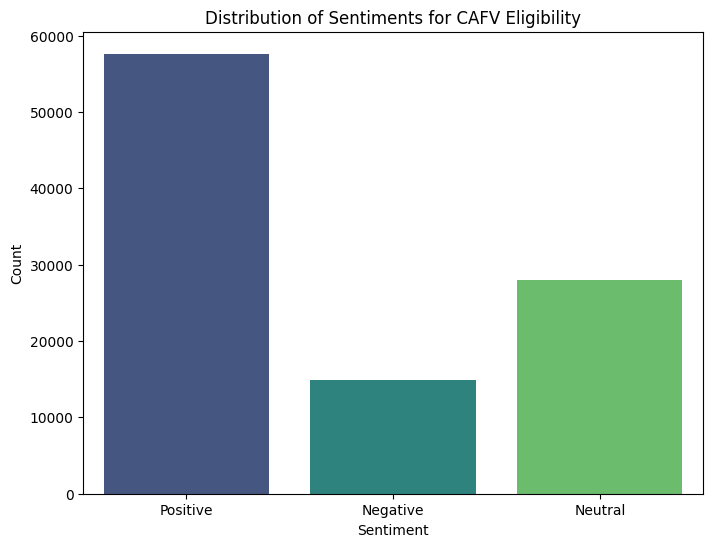

In [64]:
# Categorize sentiments into positive, neutral, and negative
sentiment_category = ['Positive' if score > 0 else 'Neutral' if score == 0 else 'Negative' for score in sentiment_scores]

# Create a DataFrame with sentiments
sentiments_df = pd.DataFrame({'Sentiment': sentiment_category, 'Count': 1})

# Plot the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=sentiments_df,hue='Sentiment', palette='viridis')
plt.title('Distribution of Sentiments for CAFV Eligibility')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()